# Analysis of manufacturing employment for various industry sectors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

#### import 2015 ASM data

In [2]:
df15 = pd.read_csv('ASM_2015_31GS101.csv')
df15 = df15[df15['YEAR.id']=='2015']
columns_2015 = ['NAICS.id', 'NAICS.display-label', 'EMP', 'EMPAVPW']
df15 = df15[columns_2015]

#### import 2005 ASM data

In [3]:
df05 = pd.read_csv('ASM_2006_31GS101.csv')
df05 = df05[df05['YEAR.id']=='2005']
columns_2005 = ['NAICS.id', 'EMPSMAO', 'EMPAVPW']
df05 = df05[columns_2005]

#### some data cleaning and math

In [4]:
df = pd.merge(df15, df05, on='NAICS.id')
df.columns = ['id', 'sector', 'emp 2015', 'prod 2015', 'emp 2005', 'prod 2005']
df['emp 2015'] = df['emp 2015'].astype(float)
df['prod 2015'] = df['prod 2015'].astype(float)
df['emp 2005'] = df['emp 2005'].astype(float)
df['prod 2005'] = df['prod 2005'].astype(float)

df['change emp'] = df['emp 2015'] - df['emp 2005']
df['percent change emp'] = df['change emp'] / df['emp 2005'] * 100
df['change prod'] = df['prod 2015'] - df['prod 2005']
df['percent change prod'] = df['change prod'] / df['prod 2005'] * 100

df_sorted = df.sort_values('change emp', ascending = False)
df_categories = df_sorted.where(df['id'].str.len() < 4).dropna()
df_best = df_categories.iloc[:5]
df_worst = df_categories.iloc[-5:]

### Plot of best and worst performing large manufacturing sectors

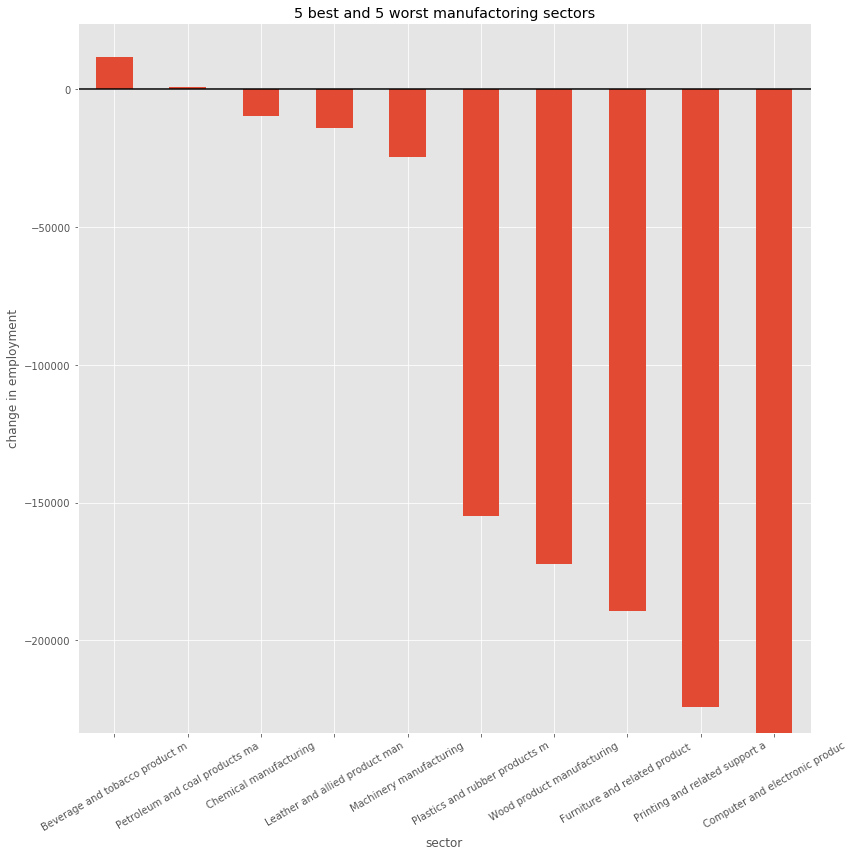

In [5]:
fig, ax = plt.subplots()
df_bestworst = pd.merge(df_best, df_worst, how='outer')
df_bestworst = df_bestworst.sort_values('change emp', ascending = False)
df_bestworst = df_bestworst.set_index(df_bestworst['sector'].str[:30])
df_bestworst['change emp'].plot(kind='bar'); plt.axhline(0, color='k')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)
ax.set_ylabel('change in employment')
ax.set_title('5 best and 5 worst manufactoring sectors')
fig.set_figheight(12)
fig.set_figwidth(12)
plt.tight_layout()

Here is a table of the data plotted above - the 5 best and 5 worst performing broad sectors within the manufacturing industry.

In [6]:
df_bestworst[['change emp', 'sector']]

,change emp,sector
sector,,
Beverage and tobacco product m,11527.0,Beverage and tobacco product manufacturing
Petroleum and coal products ma,562.0,Petroleum and coal products manufacturing
Chemical manufacturing,-9778.0,Chemical manufacturing
Leather and allied product man,-14073.0,Leather and allied product manufacturing
Machinery manufacturing,-24709.0,Machinery manufacturing
Plastics and rubber products m,-154844.0,Plastics and rubber products manufacturing
Wood product manufacturing,-172306.0,Wood product manufacturing
Furniture and related product,-189186.0,Furniture and related product manufacturing
Printing and related support a,-224124.0,Printing and related support activities


#### the top performing manufacturing subsectors

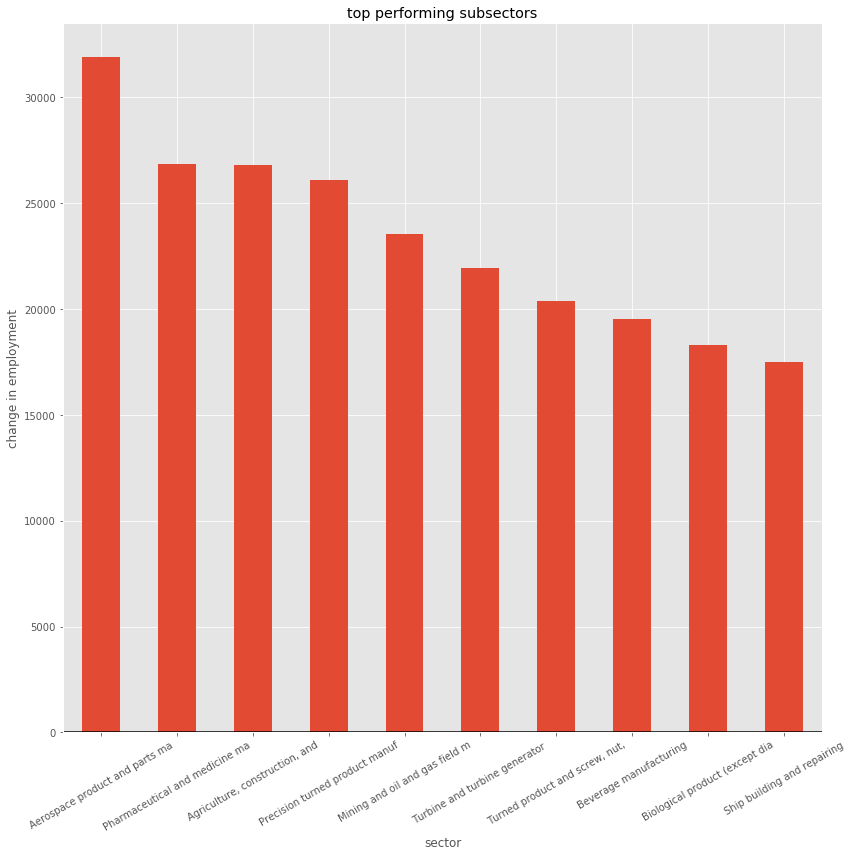

In [7]:
fig,ax = plt.subplots()
df_sorted_top = df_sorted.set_index(df_sorted['sector'].str[:30])
(df_sorted_top.loc[df_sorted_top.index.unique()[:10]][['change emp', 'sector']]
              .drop_duplicates()['change emp'].plot(kind='bar')); plt.axhline(0, color='k')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)
ax.set_ylabel('change in employment')
ax.set_title('top performing subsectors')
fig.set_figheight(12)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

Table of top 10 performing manufacturing sub-sectors

In [8]:
df_sorted_top.loc[df_sorted_top.index.unique()[:10]][['change emp', 'sector']].drop_duplicates()

,change emp,sector
sector,,
Aerospace product and parts ma,31894.0,Aerospace product and parts manufacturing
Pharmaceutical and medicine ma,26824.0,Pharmaceutical and medicine manufacturing
"Agriculture, construction, and",26790.0,"Agriculture, construction, and mining machiner..."
Precision turned product manuf,26074.0,Precision turned product manufacturing
Mining and oil and gas field m,23546.0,Mining and oil and gas field machinery manufac...
Turbine and turbine generator,21922.0,Turbine and turbine generator set units manufa...
"Turned product and screw, nut,",20393.0,"Turned product and screw, nut, and bolt manufa..."
Beverage manufacturing,19544.0,Beverage manufacturing
Biological product (except dia,18302.0,Biological product (except diagnostic) manufac...


#### create dataframes of some interesting subsectors

In [9]:
df_transport = df_sorted.where(df_sorted['id'].str.startswith('336')).dropna()
df_beverage = df_sorted.where(df_sorted['id'].str.startswith('312')).dropna()
df_petroleum = df_sorted.where(df_sorted['id'].str.startswith('324')).dropna()
df_chemical = df_sorted.where(df_sorted['id'].str.startswith('325')).dropna()

### Plot of the Petroleum and Coal manufacturing subsector

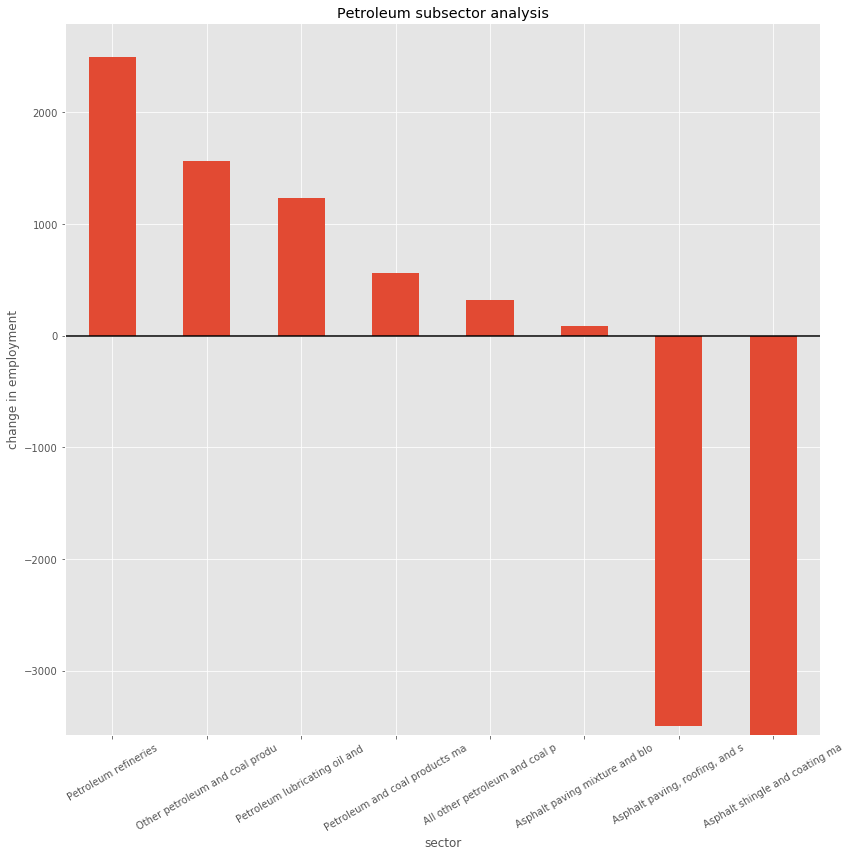

In [10]:
fig, ax = plt.subplots()
df_petroleum = df_petroleum.set_index(df_petroleum['sector'].str[:30])
df_petroleum['change emp'].drop_duplicates().plot(kind='bar'); plt.axhline(0, color='k')
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)
ax.set_ylabel('change in employment')
ax.set_title('Petroleum subsector analysis')
fig.set_figheight(12)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

Table showing the performance of each sub-sector within the petroleum and coal industries

In [11]:
df_petroleum[['change emp', 'sector']].drop_duplicates()

,change emp,sector
sector,,
Petroleum refineries,2494.0,Petroleum refineries
Other petroleum and coal produ,1561.0,Other petroleum and coal products manufacturing
Petroleum lubricating oil and,1237.0,Petroleum lubricating oil and grease manufactu...
Petroleum and coal products ma,562.0,Petroleum and coal products manufacturing
All other petroleum and coal p,324.0,All other petroleum and coal products manufact...
Asphalt paving mixture and blo,83.0,Asphalt paving mixture and block manufacturing
"Asphalt paving, roofing, and s",-3492.0,"Asphalt paving, roofing, and saturated materia..."
Asphalt shingle and coating ma,-3576.0,Asphalt shingle and coating materials manufact...
